In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib
%gui qt
matplotlib.use('Qt4Agg')
matplotlib.interactive(True)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.mlab import griddata as griddata2
from scipy.stats import kde
import seaborn as sns
from itertools import combinations, chain
from sets import Set
from scipy.stats import gaussian_kde
from projection_fxns import *
#%load_ext imayavi

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/sw/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: the sets module is deprecated
/sw/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
os.chdir('/Users/Erin/git/COX2/results')

In [3]:
param_names = ['kcat_AA2', 'kcat_AA3', 'KD_AG_cat3', 'KD_AG_cat2', 'KD_AG_allo2', 'KD_AG_allo1', 'KD_AA_allo1', 'KD_AA_allo2', 'KD_AA_allo3', 'kcat_AG3', 'KD_AA_cat3', 'KD_AA_cat2']

In [4]:
mcmc_samples = pd.DataFrame(np.load('2015_02_02_COX2_all_traces.npy'), columns=param_names)

In [5]:
uniques = mcmc_samples.drop_duplicates()

In [7]:
uniques.to_csv('CORM_parameter_sets.csv')

In [8]:
mcmc_samples_counts = mcmc_samples.groupby(param_names).size()

In [9]:
mcmc_samples_freq = mcmc_samples_counts.reset_index()

In [10]:
mcmc_samples_counts = mcmc_samples_freq.rename(columns={0:'Count'})
del mcmc_samples_freq

In [14]:
mcmc_samples_counts[['KD_AG_cat2', 'KD_AG_allo1']].values.min()

-3.6747164240446768

In [5]:
test_data = np.dstack((mcmc_samples_counts['kcat_AA2'], mcmc_samples_counts['kcat_AA3'], mcmc_samples_counts['Count']))

NameError: name 'mcmc_samples_counts' is not defined

In [10]:
test_data = np.squeeze(test_data)

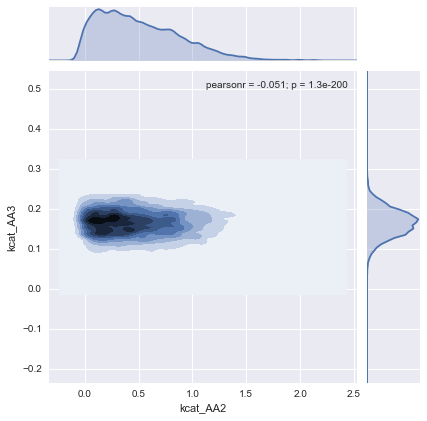

In [12]:
sns.jointplot(x='kcat_AA2', y='kcat_AA3', data=mcmc_samples, kind='kde')

In [15]:
param_corr = mcmc_samples.corr(method='spearman')

In [16]:
all_interesting_pairwise_corr = find_strong_pairwise_correlations(param_corr)

In [7]:
all_interesting_pairwise_corr

,,Correlation
KD_AG_cat2,KD_AA_cat2,0.840356
KD_AA_allo3,kcat_AG3,0.891577
KD_AG_cat3,KD_AA_cat3,0.953414
kcat_AA2,KD_AG_allo2,0.993678
KD_AG_cat2,KD_AG_allo1,-0.999977
KD_AA_allo1,KD_AA_cat3,-0.99004
KD_AG_allo2,kcat_AG3,-0.98212
kcat_AA2,kcat_AG3,-0.980615
KD_AG_cat3,KD_AA_allo1,-0.955403
kcat_AA2,KD_AA_allo3,-0.9398


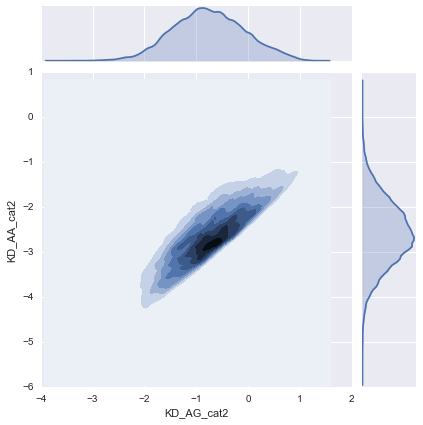

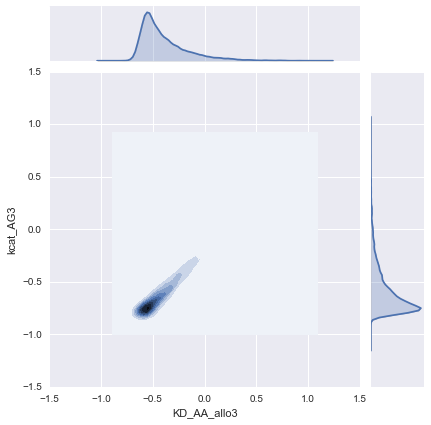

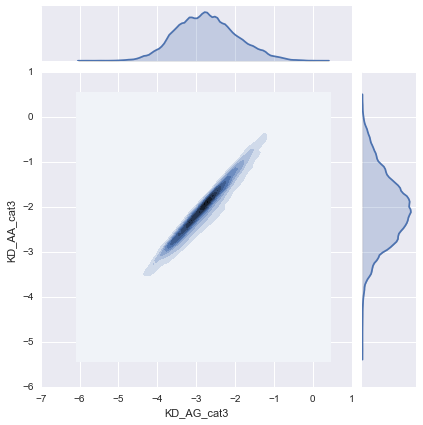

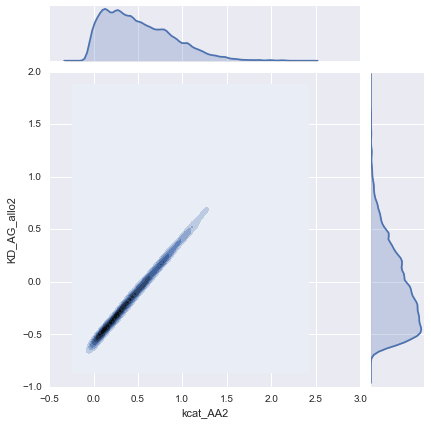

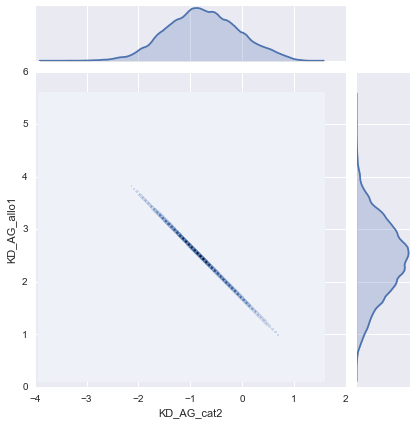

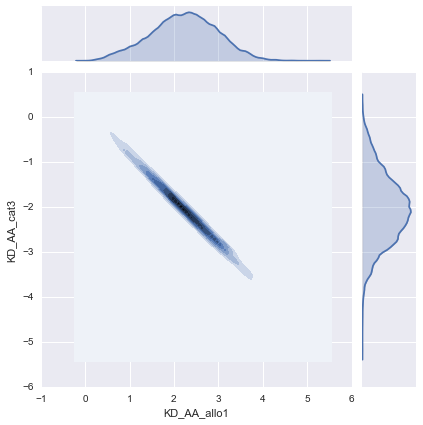

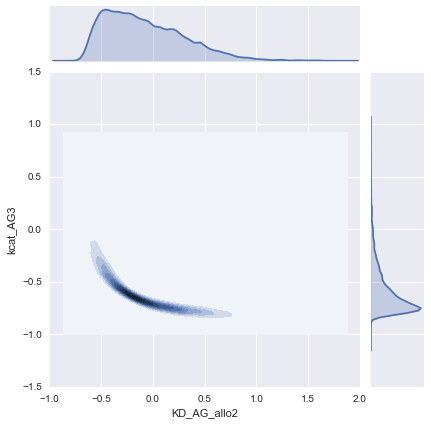

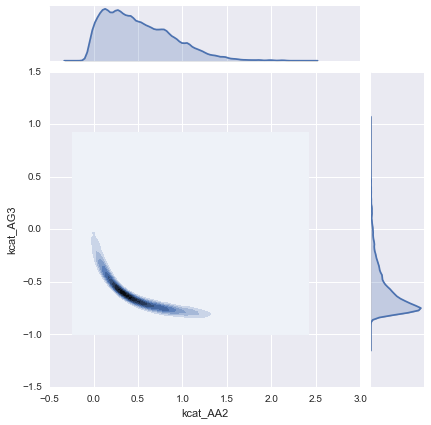

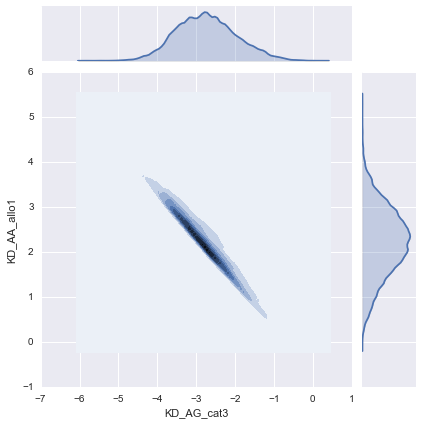

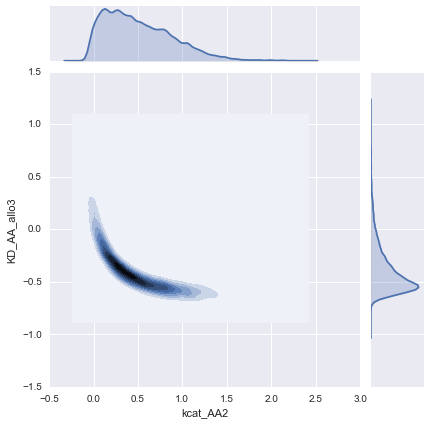

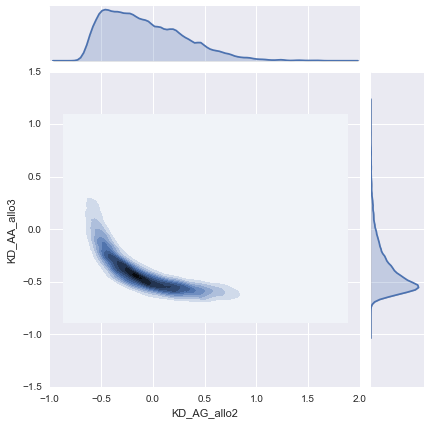

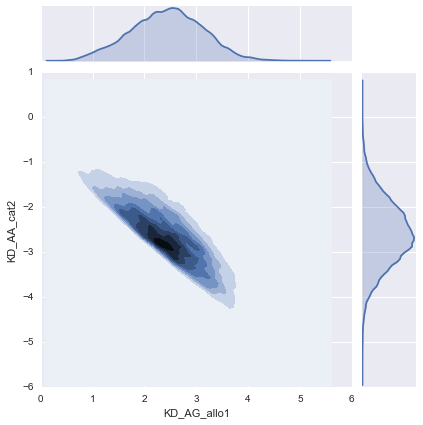

In [18]:
for combo in all_interesting_pairwise_corr.index:
    fig = plt.figure()
    sns.jointplot(x=str(combo[0]), y=str(combo[1]), data=mcmc_samples, kind='kde', stat_func=None)

In [10]:
for combo in high_corr.index:
    fig = plt.figure()
    sns.jointplot(x=str(combo[0]), y=str(combo[1]), data=mcmc_samples, kind='kde', stat_func=spearmanr)

NameError: name 'high_corr' is not defined

In [7]:
interesting_axis_dict = find_correlated_higherd_axes(all_interesting_pairwise_corr)

Testing  3  axes.  220  will be tested.
Testing  4  axes.  15  will be tested.
Testing  5  axes.  0  will be tested.


In [8]:
interesting_axis_dict

{3: [['KD_AG_cat2', 'KD_AA_cat2', 'KD_AG_allo1'],
  ['KD_AA_allo3', 'KD_AG_allo2', 'kcat_AG3'],
  ['kcat_AA2', 'KD_AA_allo3', 'kcat_AG3'],
  ['KD_AA_allo1', 'KD_AG_cat3', 'KD_AA_cat3'],
  ['kcat_AA2', 'kcat_AG3', 'KD_AG_allo2'],
  ['kcat_AA2', 'KD_AA_allo3', 'KD_AG_allo2']],
 4: [['kcat_AA2', 'KD_AA_allo3', 'KD_AG_allo2', 'kcat_AG3']]}

In [9]:
create_3d_mayavi_volume_plots(mcmc_samples, interesting_axis_dict)

Calculating axis combo:  ['KD_AG_cat2', 'KD_AA_cat2', 'KD_AG_allo1']


KeyboardInterrupt: 

In [15]:
interesting_3d_axes
test_kernel = gaussian_kde(mcmc_samples[interesting_3d_axes[0]].values.T)

In [16]:
x = mcmc_samples[interesting_3d_axes[0][0]]
y = mcmc_samples[interesting_3d_axes[0][1]]
z = mcmc_samples[interesting_3d_axes[0][2]]
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()

In [17]:
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 

In [18]:
density = test_kernel.evaluate(coords).reshape(xi.shape)

In [19]:
from enthought.mayavi import mlab

In [20]:
test_3d_fig = mlab.figure('DensityPlot')
grid = mlab.pipeline.scalar_field(xi, yi, zi, density)

/sw/lib/python2.7/site-packages/enthought/traits/has_traits.py:1922: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  setattr( self, name, value )


In [21]:
min = density.min()
max = density.max()

In [22]:
mlab.pipeline.volume(grid, vmin=min, vmax=.80)

In [23]:
mlab.axes()

In [24]:
mlab.show()

In [26]:
from projection_fxns import *

In [27]:
interesting_axes = find_correlated_higherd_axes(all_interesting_pairwise_corr)

Testing  3  axes.
Testing  4  axes.
Testing  5  axes.


In [28]:
interesting_axes

{3: [['KD_AG_cat2', 'KD_AA_cat2', 'KD_AG_allo1'],
  ['KD_AA_allo3', 'KD_AG_allo2', 'kcat_AG3'],
  ['kcat_AA2', 'KD_AA_allo3', 'kcat_AG3'],
  ['KD_AA_allo1', 'KD_AG_cat3', 'KD_AA_cat3'],
  ['kcat_AA2', 'kcat_AG3', 'KD_AG_allo2'],
  ['kcat_AA2', 'KD_AA_allo3', 'KD_AG_allo2']],
 4: [['kcat_AA2', 'KD_AA_allo3', 'KD_AG_allo2', 'kcat_AG3']]}